In [1]:
from search import Node, StackFrontier, QueueFrontier, PriorityQueueFrontier
import math
import matplotlib.pyplot as plt

def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

In [2]:
def dijkstra(cities, start):
    n = len(cities)
    distances = {city: float('inf') for city in cities}
    distances[start] = 0
    visited = set()
    frontier = PriorityQueueFrontier()
    frontier.add(Node(state=start, parent=None, action=None, h_cost=0))
    
    while not frontier.empty():
        node = frontier.remove()
        current_city = node.state
        
        if current_city in visited:
            continue
        
        visited.add(current_city)
        
        for neighbor in cities:
            if neighbor != current_city and neighbor not in visited:
                cost = euclidean_distance(current_city, neighbor)
                new_distance = distances[current_city] + cost
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    frontier.add(Node(state=neighbor, parent=node, action=None, h_cost=new_distance))
    
    return distances

In [3]:
def tsp_greedy_dijkstra(cities, start):
    shortest_paths = {city: dijkstra(cities, city) for city in cities}
    visited = set([start])
    path = [start]
    total_cost = 0
    current_city = start
    
    while len(visited) < len(cities):
        next_city = min((city for city in cities if city not in visited),
                        key=lambda city: shortest_paths[current_city][city])
        total_cost += shortest_paths[current_city][next_city]
        visited.add(next_city)
        path.append(next_city)
        current_city = next_city
    
    total_cost += shortest_paths[current_city][start]  # Return to start
    path.append(start)
    
    return path, total_cost

In [4]:
def plot_path(cities, path):
    x_coords = [city[0] for city in path]
    y_coords = [city[1] for city in path]
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Path')
    
    for i, city in enumerate(path):
        plt.text(city[0], city[1], f"{i}", fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Path using Greedy Dijkstra")
    plt.legend()
    plt.grid()
    plt.show()

Start: (0, 0), Path: [(0, 0), (10, 10), (15, 5), (20, 10), (0, 0)], Total Cost: 50.6449510224598


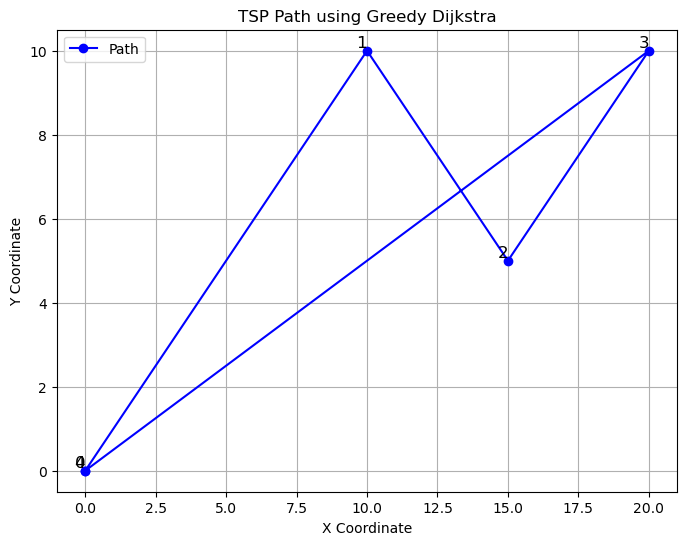

Start: (5, 5), Path: [(5, 5), (10, 15), (20, 25), (30, 35), (5, 5)], Total Cost: 78.51585951449411


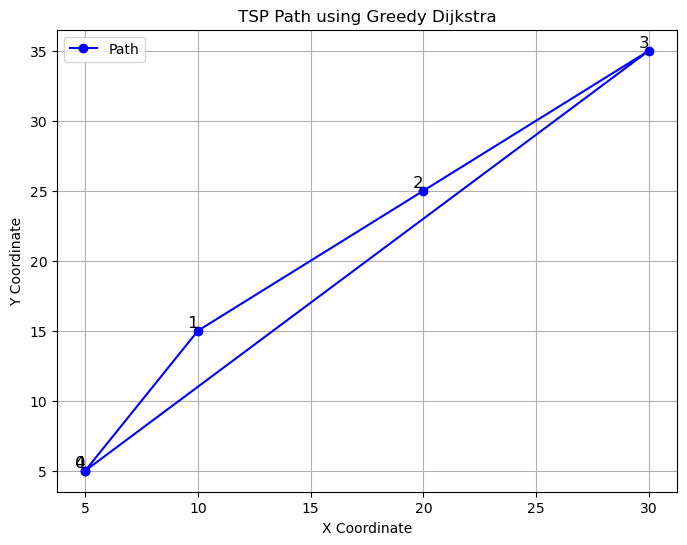

Start: (1, 1), Path: [(1, 1), (4, 3), (8, 6), (12, 10), (15, 12), (1, 1)], Total Cost: 35.67245061518521


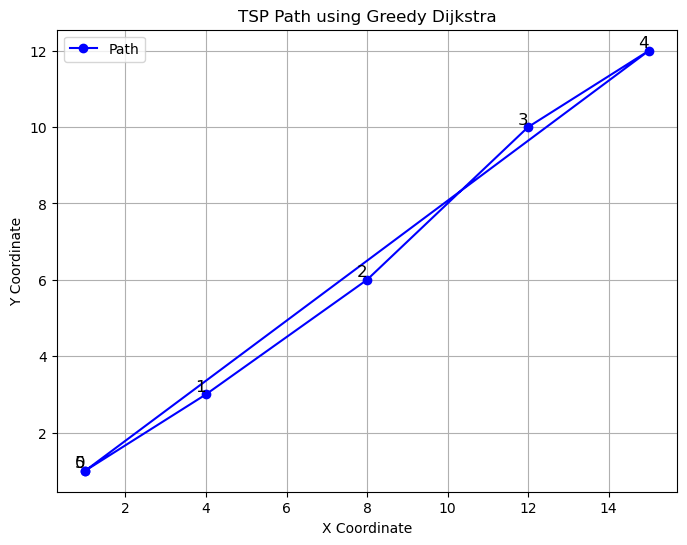

In [5]:
# Testing the function with given city coordinates
city_graphs = [
    ([(0, 0), (10, 10), (15, 5), (20, 10)], (0, 0)),
    ([(5, 5), (10, 15), (20, 25), (30, 35)], (5, 5)),
    ([(1, 1), (4, 3), (8, 6), (12, 10), (15, 12)], (1, 1))
]

for cities, start in city_graphs:
    path, cost = tsp_greedy_dijkstra(cities, start)
    print(f"Start: {start}, Path: {path}, Total Cost: {cost}")
    plot_path(cities, path)